# AI Lab Assignment: Data Preprocessing & Visualization
_______________________________________________________

You will apply data preprocessing techniques to clean, transform, and analyze a raw dataset. <br>
You will have to extract 10 or more meaningful metrics and <br>
present their findings using effective visualizations.

### Objectives

1. **Data Preprocessing Pipeline**:
    * Data Cleaning
        - Handle missing values using at least two different strategies. Explain which one makes more sense in the current scenario. 
        - Detect and address outliers. 
        - Identify and fix inconsistencies in categorical and numerical data.
    * Data Transformation
        - Normalize or standardize numerical features where necessary. 
        - Encode categorical variables using appropriate encoding techniques (one-hot, label encoding, etc.).
        - Perform feature scaling and explain its necessity in different scenarios.
    * Data Reduction
        - Apply dimensionality reduction techniques. 
        - Remove redundant or irrelevant features based on logical reasoning. 
        - Justify how data reduction improves performance and interpretability.
    * Feature Engineering
        - Create new meaningful features using transformations, aggregations, or domain knowledge. 
        - Use statistical methods (correlation analysis, feature importance) to validate the impact of new features. 
        - Explain the rationale behind feature engineering choices.
2. **Extracting & Visualizing Insights**: 
    * Extract 10 meaningful metrics and present them using visualizations.
    * Requirements: 
        - Extract 10 key insights (e.g., trends, distributions, anomalies) from the dataset through data visualization (e.g., histograms, box plots, scatter plots, heatmaps). 
        - Justify the choice of each visualization and explain the insight it conveys. <br>
        Extract interesting (funny, scary, joyful) meaning from the vizualizations and write them down. We will share them with everyone!

3. **Movie Recommendation System**: 
    * You need build a content-based movie recommendation logic using only similar metrics, without AI or ML models. <br> 
    Instead of training an algorithm, you must use feature similarity to recommend movies - as a function that given a movie title will return back Top 5 most similar movies.<br>
    It is at your imagination to come with a solution and argument why you thinks it fits the best as a recommendation logic.

Your Dataset: https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv

### Initial Setup and Imports

In [69]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Methods Used

### Import the Dataset

In [70]:
# Load dataset method
def load_dataset(url):
    """
    Load the dataset from a given URL.
    Parameters:
    - url (str): URL of the dataset.
    Returns:
    - pd.DataFrame: Loaded DataFrame.
    """
    df = pd.read_csv(url)
    return df

In [71]:
def export_dataset(df, filename):
    """
    Export the DataFrame to a CSV file.
    Parameters:
    - df (pd.DataFrame): DataFrame to export.
    - filename (str): Filename for the exported CSV.
    """
    df.to_csv(filename, index=False)
    print(f"Data exported to {filename}")

In [72]:
# Display basic information method
def display_basic_info(df):
    """
    Display basic information about the dataset.
    Parameters:
    - df (pd.DataFrame): DataFrame to display information about.
    """
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\n")
    
    print("Basic information about the dataset:")
    print(df.info())
    print("\n")
    
    print("Descriptive statistics of the dataset:")
    print(df.describe())
    print("\n")

### Data Preprocessing

0. A little bit of data exploration

In [73]:
def get_unique_values(df, columns):
    """Get unique values for each column in the DataFrame."""
    unique_values = {}
    for col in columns:
        unique_values[col] = df[col].unique()
    return unique_values

In [74]:
def has_non_printable(s):
    return any(ord(c) < 32 for c in str(s))

1. Data Cleaning

- Duplicate Rows

In [75]:
def check_duplicates(df):
    """Check for duplicates in the DataFrame."""

    # Check for duplicates
    print("Duplicate Rows:", df.duplicated().sum())

    # Drop duplicates
    df.drop_duplicates(inplace=True)

    # Check for duplicates after dropping
    print("Duplicate Rows:", df.duplicated().sum())

- Missing values

In [76]:
# Strategy 1
def remove_missing(df):
    """Remove missing values from the DataFrame."""
    
    df_removed = df.dropna()
    return df_removed

In [77]:
type_mapping = {
    'Poster_Link':    'str',
    'Series_Title':   'str',
    'Released_Year':  'int',
    'Certificate':    'int', 
    'Runtime':        'int', 
    'Genre':          'str', 
    'IMDB_Rating':    'float',
    'Overview':       'str', 
    'Meta_score':     'int',
    'Director':       'str', 
    'Star1':          'str', 
    'Star2':          'str', 
    'Star3':          'str', 
    'Star4':          'str', 
    'No_of_Votes':    'int', 
    'Gross':          'int'
}

In [78]:
# Strategy 2
def impute_missing(df, target_column, expected_type):
    """
    Impute missing values in a specific column of the DataFrame based on the expected type.
    
    Parameters:
    - df (pd.DataFrame): DataFrame to impute missing values in.
    - target_column (str): The column to impute missing values for.
    - expected_type (str or type): The expected type of the column ('numerical', 'categorical', or a specific type like int, float, str).
    
    Returns:
    - pd.DataFrame: DataFrame with imputed missing values in the target column.
    
    Raises:
    - ValueError: If the target column is not in the DataFrame or if the expected type is invalid.
    """
    # Create a copy of the original DataFrame
    df_imputed = df.copy()
    
    # Validate that the target column exists in the DataFrame
    if target_column not in df_imputed.columns:
        raise ValueError(f"Target column '{target_column}' not found in DataFrame. Available columns: {df_imputed.columns.tolist()}")
    
    # Check if there are missing values in the target column
    if df_imputed[target_column].isnull().sum() == 0:
        print(f"No missing values found in column '{target_column}'.")
        return df_imputed
    
    # Determine the imputation strategy based on expected_type 'int', 'float', 'str'
    if expected_type in ['int', 'float']:
        # Impute numerical column with median
        print(f"Imputing missing values in '{target_column}' as numerical using median...")
        median_value = df_imputed[target_column].median()
        df_imputed[target_column].fillna(median_value, inplace=True)
        
        # Convert to the specific numerical type if specified
        if expected_type == 'int':
            df_imputed[target_column] = df_imputed[target_column].astype(int)
        elif expected_type == 'float':
            df_imputed[target_column] = df_imputed[target_column].astype(float)
            
    elif expected_type is 'str':
        # Impute categorical column with mode
        print(f"Imputing missing values in '{target_column}' as categorical using mode...")
        mode_value = df_imputed[target_column].mode()[0]
        df_imputed[target_column].fillna(mode_value, inplace=True)
        
        # Ensure the column is of type string
        df_imputed[target_column] = df_imputed[target_column].astype(str)
        
    else:
        raise ValueError(f"Invalid expected_type '{expected_type}'. Use 'numerical', 'categorical', or a specific type like int, float, str.")
    
    # Verify the imputation
    print(f"Missing values in '{target_column}' after imputation: {df_imputed[target_column].isnull().sum()}")
    
    return df_imputed

In [79]:
# Strategy 3

def impute_certificate_by_genre(df):
    """
    Impute missing values in the 'Certificate' column based on the median Certificate value
    of movies with the same genres.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing 'Certificate' and 'Genre' columns
    
    Returns:
    - pd.DataFrame: DataFrame with imputed 'Certificate' values
    """
    # Step 1: Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    missing_cert = df_copy['Certificate'].isna()
    
    # Step 3: Create a dictionary to store median Certificate for each genre
    genre_medians = {}
    
    # Explode the genres so each movie contributes to all its genres
    exploded_df = df_copy.explode('Genre')
    
    # Calculate the median Certificate for each genre (excluding nan values)
    for genre in exploded_df['Genre'].unique():
        genre_certificates = exploded_df[
            (exploded_df['Genre'] == genre) & 
            (exploded_df['Certificate'].notna())
        ]['Certificate']
        if not genre_certificates.empty:
            genre_medians[genre] = genre_certificates.median()
        else:
            genre_medians[genre] = 0  # Default to 0 if no non-nan Certificates for this genre
    
    # Step 4: Impute missing Certificate values
    for idx in df_copy[missing_cert].index:
        genres = df_copy.loc[idx, 'Genre']
        if not genres:  # If no genres, use the global median
            df_copy.loc[idx, 'Certificate'] = df_copy['Certificate'].median()
            print(f"No genres for index {idx}. Using global median for 'Certificate'.")
            continue
        
        # Calculate the average of the Certificate medians for these genres
        genre_cert_medians = [genre_medians.get(genre) for genre in genres if genre in genre_medians]
        if genre_cert_medians:
            # Average the medians and round to the nearest integer
            imputed_value = round(sum(genre_cert_medians) / len(genre_cert_medians))
            df_copy.loc[idx, 'Certificate'] = imputed_value
        else:
            # If no genres have a median, use the global median
            df_copy.loc[idx, 'Certificate'] = df_copy['Certificate'].median()
            print(f"No Certificate medians found for genres {genres} at index {idx}. Using global median.")
    
    return df_copy

In [80]:
def impute_meta_score_by_rating(df):
    """
    Impute missing 'Meta_score' values based on the mean 'Meta_score' of movies
    with similar 'IMDB_Rating' values (grouped into bins).
    
    Parameters:
    - df (pd.DataFrame): DataFrame with 'Meta_score' and 'IMDB_Rating' columns.
    - rating_bins (list or int, optional): Bins for 'IMDB_Rating'. If None, uses default bins.
    
    Returns:
    - pd.DataFrame: DataFrame with imputed 'Meta_score' values.
    """
    df = df.copy()
    
    # Check if there are missing 'Meta_score' values
    missing_meta = df['Meta_score'].isna()
    if not missing_meta.any():
        print("No missing 'Meta_score' values to impute.")
        return df
    
    # Define default bins for 'IMDB_Rating' (e.g., 7.0 to 10.0, in 0.5 increments)
    rating_bins = np.arange(7.0, 10.1, 0.5)  # [7.0, 7.5, 8.0, ..., 10.0]
    
    # Bin the 'IMDB_Rating' values
    df['Rating_Bin'] = pd.cut(df['IMDB_Rating'], bins=rating_bins, include_lowest=True)
    
    # For each row with a missing 'Meta_score', impute based on the rating bin
    for idx in df[missing_meta].index:
        rating_bin = df.loc[idx, 'Rating_Bin']
        
        # Find movies in the same rating bin (excluding the current movie and those with missing 'Meta_score')
        similar_movies = df[
            (df.index != idx) &
            (~df['Meta_score'].isna()) &
            (df['Rating_Bin'] == rating_bin)
        ]
        
        if not similar_movies.empty:
            # Calculate the mean 'Meta_score' of similar movies
            mean_meta = similar_movies['Meta_score'].mean()
            df.loc[idx, 'Meta_score'] = mean_meta
        else:
            # If no similar movies are found, use the overall median
            df.loc[idx, 'Meta_score'] = df['Meta_score'].median()
            print(f"No movies found in rating bin {rating_bin} for index {idx}. Using overall median.")
    
    # Drop the temporary 'Rating_Bin' column
    df = df.drop(columns=['Rating_Bin'])
    
    return df

In [81]:
def impute_gross_by_votes(df):
    """
    Impute missing 'Gross' values based on the mean 'Gross' of movies
    with similar 'No_of_Votes' values (grouped into bins).
    
    Parameters:
    - df (pd.DataFrame): DataFrame with 'Gross' and 'No_of_Votes' columns.
    
    Returns:
    - pd.DataFrame: DataFrame with imputed 'Gross' values.
    """
    df = df.copy()
    
    # Check if there are missing 'Gross' values
    missing_gross = df['Gross'].isna()
    if not missing_gross.any():
        print("No missing 'Gross' values to impute.")
        return df
    
    # Define default bins for 'No_of_Votes' (e.g., logarithmic bins to handle wide range)
    vote_bins = np.logspace(np.log10(1), np.log10(df['No_of_Votes'].max()), num=10).astype(int)
    
    # Bin the 'No_of_Votes' values
    df['Votes_Bin'] = pd.cut(df['No_of_Votes'], bins=vote_bins, include_lowest=True)
    
    # For each row with a missing 'Gross', impute based on the votes bin
    for idx in df[missing_gross].index:
        votes_bin = df.loc[idx, 'Votes_Bin']
        
        # Find movies in the same votes bin (excluding the current movie and those with missing 'Gross')
        similar_movies = df[
            (df.index != idx) &
            (~df['Gross'].isna()) &
            (df['Votes_Bin'] == votes_bin)
        ]
        
        if not similar_movies.empty:
            # Calculate the mean 'Gross' of similar movies
            mean_gross = similar_movies['Gross'].mean()
            df.loc[idx, 'Gross'] = round(mean_gross)  # Round to nearest integer since 'Gross' is int
        else:
            # If no similar movies are found, use the overall median
            df.loc[idx, 'Gross'] = round(df['Gross'].median())
            print(f"No movies found in votes bin {votes_bin} for index {idx}. Using overall median.")
    
    # Drop the temporary 'Votes_Bin' column
    df = df.drop(columns=['Votes_Bin'])
    
    return df

- Outliers

In [82]:
def detect_outliers(df, column):
    """Detect outliers using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

- Identify and fix inconsistencies

2. Data Transformation

In [83]:
def change_to_numeric(df, column):
    """
    Convert a column to numeric values, turning non-numeric values into NaN.
    Automatically determines if the column should be int or float based on its values.
    Does not impute missing values; leaves NaN as is for further processing.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing the column to convert.
    - column (str): Name of the column to convert.
    
    Returns:
    - None: Modifies the DataFrame in place.
    """
    # Convert the column to numeric, coercing non-numeric values to NaN
    numeric_series = pd.to_numeric(df[column], errors='coerce')
    
    # Detect non-numeric values
    non_numeric_values = df[column][numeric_series.isna()]
    
    if not non_numeric_values.empty:
        print(f"\nNon-numeric values in {column}:")
        print(non_numeric_values)
    
    # Check if the numeric values (excluding NaN) are all integers
    if not numeric_series.isna().all():  # Ensure there are some non-NaN values
        # Drop NaN values temporarily to check for integer-like values
        non_na_values = numeric_series.dropna()
        # Check if all non-NaN values are effectively integers (e.g., 1994.0)
        is_integer_like = (non_na_values == non_na_values.astype(int)).all()
        
        if is_integer_like:
            # If all values are integer-like, convert to int (NaN will be preserved as float, then handled later)
            df[column] = numeric_series.fillna(pd.NA).astype('Int64')  # Use Int64 to support NaN with integers
        else:
            # Otherwise, keep as float to preserve decimals
            df[column] = numeric_series  # Already float64 due to pd.to_numeric
    else:
        # If all values are NaN, default to float (since Int64 can't be all NaN without a type hint)
        df[column] = numeric_series

In [84]:
def convert_genre_to_list(df):
    df['Genre'] = df['Genre'].str.split(', ').apply(lambda x: [genre.strip() for genre in x])
    return df

def convert_genre_to_string(df):
    df['Genre'] = df['Genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
    return df

# dfc = convert_genre_to_list(df)
# print(dfc['Genre'].head())  # Debugging line to check the Genre column after conversion

# dfc = convert_genre_to_string(dfc)
# print(dfc['Genre'].head())  # Debugging line to check the Genre column after conversion


#### Data Reduction

In [85]:
def drop_column_useless(df, column):
    """
    Remove useless column from the DataFrame.
    
    Parameters:
    - df (pd.DataFrame): DataFrame to remove the column from.
    - column (str): Column to remove from the DataFrame.
    
    Returns:
    - pd.DataFrame: DataFrame with the column removed.
    """
    df = df.drop(column, axis=1)
    return df

In [86]:
def drop_columns_high_missing(df, threshold):
    """
    Drop columns with missing values above a certain threshold.
    
    Parameters:
    - df (pd.DataFrame): DataFrame to drop columns from.
    - threshold (float): Threshold for missing values.
    
    Returns:
    - pd.DataFrame: DataFrame with columns dropped.
    """
    df = df.dropna(thresh=threshold, axis=1)
    return df

In [87]:
def drom_columns_low_variance(df, threshold):
    """
    Drop columns with variance below a certain threshold.
    
    Parameters:
    - df (pd.DataFrame): DataFrame to drop columns from.
    - threshold (float): Threshold for variance.
    
    Returns:
    - pd.DataFrame: DataFrame with columns dropped.
    """
    df = df.drop(df.var()[df.var() < threshold].index, axis=1)
    return df

#### Feature Engineering

### Extracting & Visualizing Insights

Correlation Matrix

In [88]:
def plot_correlation_matrix(df, figsize=(12, 10), threshold=0.5):
    """
    Create and display a correlation matrix heatmap for numerical columns in the DataFrame.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame containing the data
    - figsize (tuple): Figure size as (width, height) in inches
    - threshold (float): Threshold for identifying strong correlations (|r| > threshold)
    
    Returns:
    - None: Displays the plot and prints strong correlations
    """
    try:
        # Select only numeric columns
        numeric_df = df.select_dtypes(include=[np.number])
        
        if numeric_df.empty:
            print("No numerical columns found in the DataFrame.")
            return
        
        # Calculate correlation matrix
        corr_matrix = numeric_df.corr()
        
        # Set up the matplotlib figure
        plt.figure(figsize=figsize)
        
        # Create mask for upper triangle
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        
        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        
        # Draw the heatmap
        sns.heatmap(corr_matrix,
                   mask=mask,
                   annot=True,
                   fmt='.2f',
                   cmap=cmap,
                   square=True,
                   linewidths=0.5,
                   cbar_kws={"shrink": 0.8})
        
        plt.title('Correlation Matrix for Numeric Features', fontsize=16, pad=20)
        plt.tight_layout()
        plt.show()
        
        # Print strongest correlations
        print(f"Strongest correlations (|r| > {threshold}):")
        strong_correlations = corr_matrix.unstack().sort_values(ascending=False)
        strong_correlations = strong_correlations[
            (abs(strong_correlations) > threshold) & 
            (abs(strong_correlations) < 1.0)
        ]
        
        if not strong_correlations.empty:
            print(strong_correlations)
        else:
            print("No strong correlations found.")
            
    except Exception as e:
        print(f"Error generating correlation matrix: {str(e)}")

#### 

# Run

### Load Dataset

In [89]:
# Load the Dataset
url = "https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv"
df = load_dataset(url)

# Display Basic Information
display_basic_info(df)

First 5 rows of the dataset:
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0 

### Data Preprocessing

#### 0. A little bit of data exploration 

Before searching for outliers and inconsistencies, we will explore the data a little bit.

In [90]:
columns = df.columns.tolist()

# eliminate poster_link and overview columns
columns.remove('Poster_Link')
columns.remove('Series_Title')
columns.remove('Overview')

unique_values = get_unique_values(df, columns)

# Display unique values for each column
for key, value in unique_values.items():
    print(f"\n{key} (Unique Values):")
    print(value)


Released_Year (Unique Values):
['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943' 'PG']

Certificate (Unique Values):
['A' 'UA' 'U' 'PG-13' 'R' nan 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA'
 'Unrated' 'GP' 'Approved' 'TV-PG' 'U/A']

Runtime (Unique Values):
['142 min' '175 min' '152 min' '202 min' '96 min' '201 min' '154 min'
 '195 min' '148 min' '

We see that there is some missalignment in the data, so we will fix it. <br>
For now, I will just print the movies with PG in Released_Year column.

In [91]:
print("\nRows with 'Released_Year' as 'PG':")
pg_rows = df[df['Released_Year'] == 'PG']
print(pg_rows)


Rows with 'Released_Year' as 'PG':
                                           Poster_Link Series_Title  \
966  https://m.media-amazon.com/images/M/MV5BNjEzYj...    Apollo 13   

    Released_Year Certificate  Runtime                      Genre  \
966            PG           U  140 min  Adventure, Drama, History   

     IMDB_Rating                                           Overview  \
966          7.6  NASA must devise a strategy to return Apollo 1...   

     Meta_score    Director      Star1        Star2        Star3        Star4  \
966        77.0  Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise   

     No_of_Votes        Gross  
966       269197  173,837,933  


We observe that the Released_Year of the movie is a Certificate, but we also have correct data in the Certificate column. <br>
Data is not missaligned, so the problem is in the data itself, and it will be fixed when we fix inconsistencies.

#### 1. Data Cleaning

##### Duplicate Rows

We’ll check for and remove duplicate rows in the dataset.

In [92]:
check_duplicates(df)

Duplicate Rows: 0
Duplicate Rows: 0


##### Missing values

We’ll check for and handle missing values in the dataset.

In [93]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nDataset Shape:", df.shape)

Missing Values:
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Dataset Shape: (1000, 16)


**Strategy 1**: Remove rows with missing values.

In [94]:
# Remove rows with any missing values
df_strategy1 = df.dropna()

# Display the number of missing values and dataset shape after deletion
print("\nMissing Values After Deletion:")
print(df_strategy1.isnull().sum())
print("\nDataset Shape After Deletion:", df_strategy1.shape)


Missing Values After Deletion:
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Dataset Shape After Deletion: (714, 16)


**Strategy 2**: Impute missing values with the **median for numerical columns** and **mode for categorical columns**.

In [95]:
df_strategy2 = df.copy()
cols = df.columns.tolist()

for col in cols:
    df_strategy2 = impute_missing(df_strategy2, col, 'str')

print("\nMissing Values After Imputation:")
print(df_strategy2.isnull().sum())
print("\nDataset Shape After Imputation:", df_strategy2.shape)

No missing values found in column 'Poster_Link'.
No missing values found in column 'Series_Title'.
No missing values found in column 'Released_Year'.
Imputing missing values in 'Certificate' as categorical using mode...
Missing values in 'Certificate' after imputation: 0
No missing values found in column 'Runtime'.
No missing values found in column 'Genre'.


No missing values found in column 'IMDB_Rating'.
No missing values found in column 'Overview'.
Imputing missing values in 'Meta_score' as categorical using mode...
Missing values in 'Meta_score' after imputation: 0
No missing values found in column 'Director'.
No missing values found in column 'Star1'.
No missing values found in column 'Star2'.
No missing values found in column 'Star3'.
No missing values found in column 'Star4'.
No missing values found in column 'No_of_Votes'.
Imputing missing values in 'Gross' as categorical using mode...
Missing values in 'Gross' after imputation: 0

Missing Values After Imputation:
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Dataset Shape After Imputation: (1000, 16)


The first strategy (deleting rows with missing data) leads to significant data loss, as missing values are spread across many rows. <br>
In contrast, the second strategy (imputing with median for numerical columns and mode for categorical columns) preserves all rows, maintaining the dataset's size and ensuring more data is available for analysis. 

We have to keep in mind that the added data is certainly not accurate, but it is better than losing rows entirely.
If we are going to do some filters based on the columns with missing data, now we cannot be sure that the data is accurate.
But if we are doing statistical analysis on the entire dataset, the bias introduced by imputation is less harmful than the bias introduced by deleting rows.

Below, we compare the number of rows retained by each strategy to highlight the advantage of imputation.

In [96]:
# Compare the number of rows retained by each strategy
print("Original Dataset Rows:", df.shape[0])
print("Rows After Strategy 1 (Deletion):", df_strategy1.shape[0])
print("Rows After Strategy 2 (Imputation):", df_strategy2.shape[0])

# Calculate data loss from Strategy 1
data_loss = df.shape[0] - df_strategy1.shape[0]
print(f"\nPercentange of Data lost from Strategy 1: {(data_loss/df.shape[0])*100:.2f}% of the dataset")

Original Dataset Rows: 1000
Rows After Strategy 1 (Deletion): 714
Rows After Strategy 2 (Imputation): 1000

Percentange of Data lost from Strategy 1: 28.60% of the dataset


As 28% of the rows contain missing values, removing them would lead to a significant loss of data.

~~We will copy te data from the second strategy to the original dataframe for further analysis.~~

In [97]:
# df = df_strategy2.copy()
# print("\nProceeding with Strategy 2: Imputation. Updated df shape:", df.shape)
# print("Columns in df:", df.columns.tolist())

Even though the second strategy may be good enough, I will keep the original database untill <br>
I tranform some columns to numerical values to be able to use them as predictors to the missing data.

**Strategy 3**: Predictive Imputation

For the columns with missing values, we can use predictive imputation to estimate the missing values based on other columns. <br> <br>
For `Certificate`, we can use `Genre` to predict the missing values. <br>
~~For `Meta_score`, we can use `Rating` to predict the missing values. <br>~~
For `Gross`, we can use `Votes` to predict the missing values. <br>

##### Outliers

The numerical columns in the dataset are `Released_Year`, `IMDB_Rating`, `Meta_score`, `No_of_Votes` <br>
`Runtime` is also a numerical column, but it is stored as a string with "min" suffix. We will convert it to an integer before detecting outliers. <br>
`Gross` is also a numerical column, but it is stored as a string (with commas) and will be converted to an integer before detecting outliers. <br>
`Certificate` will be converted to a numerical column. <br>

Because some numerical columns are not in the correct format, the method will be applied only after Identifiying and fixing inconsistencies and data transformation.

##### Identify and fix inconsistencies

#### 2. Data Transformation

Tranform data in `Runtime` by removing "min".

In [98]:
# transorm data in 'Runtime' by removing 'min'
print("Cleaning 'Runtime'...\n")

print("Before transformation: \n")
print(df['Runtime'].head())

df['Runtime'] = df['Runtime'].str.replace(' min', '')

print("\nAfter transformation: \n")
print(df['Runtime'].head())

Cleaning 'Runtime'...

Before transformation: 

0    142 min
1    175 min
2    152 min
3    202 min
4     96 min
Name: Runtime, dtype: object

After transformation: 

0    142
1    175
2    152
3    202
4     96
Name: Runtime, dtype: object


Transform data in `Gross` by removing commas ','

In [99]:
# transform data in `Gross` by removing commas ','
print("Cleaning 'Gross'...\n")

print("Before transformation: \n")
print(df['Gross'].head())

df['Gross'] = df['Gross'].str.replace(',', '', regex=False)

print("\nAfter transformation: \n")
print(df['Gross'].head())

Cleaning 'Gross'...

Before transformation: 

0     28,341,469
1    134,966,411
2    534,858,444
3     57,300,000
4      4,360,000
Name: Gross, dtype: object

After transformation: 

0     28341469
1    134966411
2    534858444
3     57300000
4      4360000
Name: Gross, dtype: object


Transform the data in numerical columns to the correct format.

In [100]:
columns = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
for col in columns:
    change_to_numeric(df, col)


Non-numeric values in Released_Year:
966    PG
Name: Released_Year, dtype: object

Non-numeric values in Meta_score:
20    NaN
54    NaN
55    NaN
57    NaN
65    NaN
       ..
872   NaN
874   NaN
899   NaN
909   NaN
913   NaN
Name: Meta_score, Length: 157, dtype: float64



Non-numeric values in Gross:
18     NaN
20     NaN
30     NaN
32     NaN
46     NaN
      ... 
993    NaN
995    NaN
996    NaN
998    NaN
999    NaN
Name: Gross, Length: 169, dtype: object


Transform data in `Genre` into lists

In [101]:
df = convert_genre_to_list(df)

Transform the data in `Certificate` to numerical values.

In [102]:
# get all unique values in 'Certificate' column
print("\nUnique values in 'Certificate' column:")
print(df['Certificate'].unique())


Unique values in 'Certificate' column:
['A' 'UA' 'U' 'PG-13' 'R' nan 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA'
 'Unrated' 'GP' 'Approved' 'TV-PG' 'U/A']


In [103]:
certificate_map = {
    'U': 0,            # Universal (no age restriction)
    'G': 0,            # General audiences (all ages admitted)
    'Passed': 0,       # No age restriction (old certification)
    'Approved': 0,     # No age restriction (old certification)
    'Unrated': 0,      # No rating (assume no age restriction)
    'PG': 10,          # Parental guidance suggested (some material may not be suitable for children)
    'GP': 10,          # Same as PG
    'TV-PG': 10,       # Parental guidance suggested (some material may not be suitable for children)
    'UA': 12,          # Parental guidance for children under 12
    'U/A': 12,         # Same as UA
    'PG-13': 13,       # Parents strongly cautioned (some material may be inappropriate for children under 13)
    'TV-14': 14,       # Parents strongly cautioned (may be unsuitable for children under 14)
    '16': 16,          # Suitable for ages 16 and above
    'R': 17,           # Restricted (under 17 requires accompanying parent or adult guardian)
    'TV-MA': 17,       # Mature audiences only (may be unsuitable for children under 17)
    'A': 18,            # Adults only
}

In [104]:
for key, value in certificate_map.items():
    df['Certificate'] = df['Certificate'].replace(key, value)

print("\nUnique values in 'Certificate' column after mapping:")
print(df['Certificate'].unique())


Unique values in 'Certificate' column after mapping:
[18. 12.  0. 13. 17. nan 10. 14. 16.]


Change `Certificate` to int but keep nans

In [105]:
change_to_numeric(df, 'Certificate')

print("\nUnique values in 'Certificate' column after conversion:")
print(df['Certificate'].unique())


Non-numeric values in Certificate:
30    NaN
54    NaN
77    NaN
92    NaN
121   NaN
       ..
920   NaN
926   NaN
944   NaN
998   NaN
999   NaN
Name: Certificate, Length: 101, dtype: float64

Unique values in 'Certificate' column after conversion:
<IntegerArray>
[18, 12, 0, 13, 17, <NA>, 10, 14, 16]
Length: 9, dtype: Int64


Impute missing values in 'Certificate' based on Genre

In [106]:
df = impute_certificate_by_genre(df)

Impute missing values in 'Gross' based on No_of_Votes

In [107]:
df = impute_gross_by_votes(df)

Having Released_year and Meta_score not closely related to any other columns, we impute them with impute_missing method

In [108]:
df = impute_missing(df, 'Released_Year', type_mapping['Released_Year'])
df = impute_missing(df, 'Meta_score', type_mapping['Meta_score'])

Imputing missing values in 'Released_Year' as numerical using median...
Missing values in 'Released_Year' after imputation: 0
Imputing missing values in 'Meta_score' as numerical using median...
Missing values in 'Meta_score' after imputation: 0


#### 3. Data Reduction

**Useless Columns** <br>
Remove columns that are not useful for analysis like `Poster_Link`. <br>
The other column that may be considered useless is `Overview`, but we will keep it for insights and movie recommendation.

In [109]:
df = drop_column_useless(df, 'Poster_Link')

print(df.columns.tolist())

['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


**Columns with high percantage of missing values**. <br>
We will remove columns with more than 50% missing values.

**Columns with low variance** <br>
Remove columns with low variance as they do not provide much information. <br>

After all of this, we will display basic info to see what changed

In [110]:
display_basic_info(df)

First 5 rows of the dataset:
               Series_Title  Released_Year  Certificate  Runtime  \
0  The Shawshank Redemption           1994           18      142   
1             The Godfather           1972           18      175   
2           The Dark Knight           2008           12      152   
3    The Godfather: Part II           1974           18      202   
4              12 Angry Men           1957            0       96   

                    Genre  IMDB_Rating  \
0                 [Drama]          9.3   
1          [Crime, Drama]          9.2   
2  [Action, Crime, Drama]          9.0   
3          [Crime, Drama]          9.0   
4          [Crime, Drama]          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...          80   
1  An organized crime dynasty's aging patriarch t...         100   
2  When the menace known as the Joker wreaks havo...          84   
3  The early life and career of Vito 

In [111]:
export_dataset(df, 'imdb_top_1000_cleaned.csv')

Data exported to imdb_top_1000_cleaned.csv


### CEVA

In [112]:
# # Load the Dataset
# url = "https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv"
# df = load_dataset(url)

# # Display Basic Information
# # display_basic_info(df)

# # 1. Drop 'Poster_Link'

# df = drop_column_useless(df, 'Poster_Link')

# print(df.columns.tolist())

# # check_duplicates(df)

# # Check for missing values
# # print("Missing Values:")
# # print(df.isnull().sum())
# # print("\nDataset Shape:", df.shape)

# # 2. Transorm data in 'Runtime' by removing 'min'

# df['Runtime'] = df['Runtime'].str.replace(' min', '')

# # 3. Transform data in `Gross` by removing commas ','

# df['Gross'] = df['Gross'].str.replace(',', '', regex=False)

# print("\n________\n")

# # Certificate, Meta_score, and Gross columns have empty data

# # 4. Change to numeric but keep NaN as is
# columns = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
# for col in columns:
#     change_to_numeric(df, col)

# print("\n________\n")

# # 5. Change Genre to list
# df = convert_genre_to_list(df)

# print("\n________\n")

# # 6. Change Certificate to numeric values
# for key, value in certificate_map.items():
#     df['Certificate'] = df['Certificate'].replace(key, value)

# # change to int but keep NaN as is
# change_to_numeric(df, 'Certificate')

# print("\n________\n")

# # 7. Impute missing values in 'Certificate' based on Genre
# df = impute_certificate_by_genre(df)

# # 8. Impute missing values in 'Gross' based on No_of_Votes
# df = impute_gross_by_votes(df)

# # 9. Having Released_year and Meta_score not closely related to any other columns, we impute them with impute_missing method
# df = impute_missing(df, 'Released_Year', type_mapping['Released_Year'])
# df = impute_missing(df, 'Meta_score', type_mapping['Meta_score'])


# display_basic_info(df)

# #plot_correlation_matrix(df, figsize=(12, 10), threshold=0.4)

# Insights

Plot correlation matrix to see how the columns are related to each other. <br>

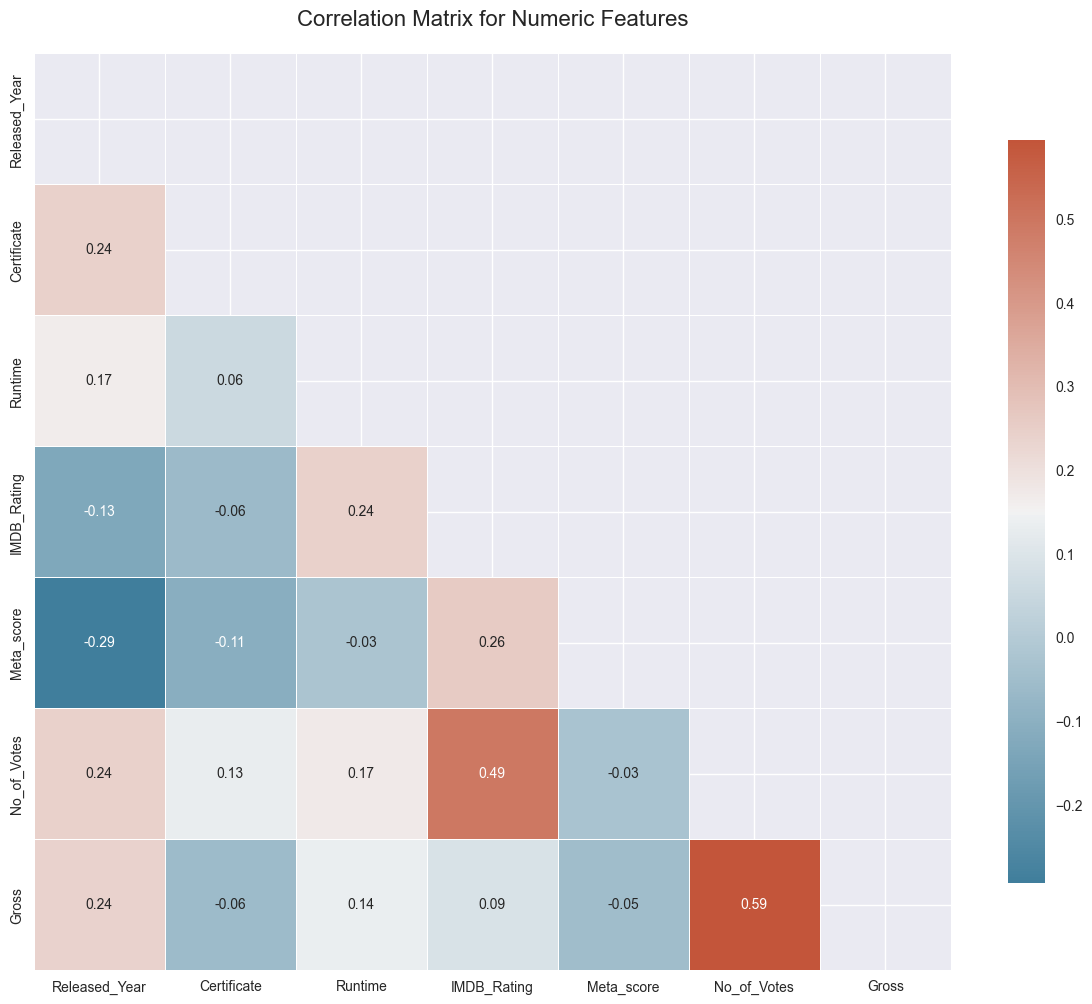

Strongest correlations (|r| > 0.4):
No_of_Votes  Gross          0.594302
Gross        No_of_Votes    0.594302
No_of_Votes  IMDB_Rating    0.494979
IMDB_Rating  No_of_Votes    0.494979
dtype: float64


In [113]:
plot_correlation_matrix(df, figsize=(12, 10), threshold=0.4)

### Insight 1: Distribution of IMDB Ratings


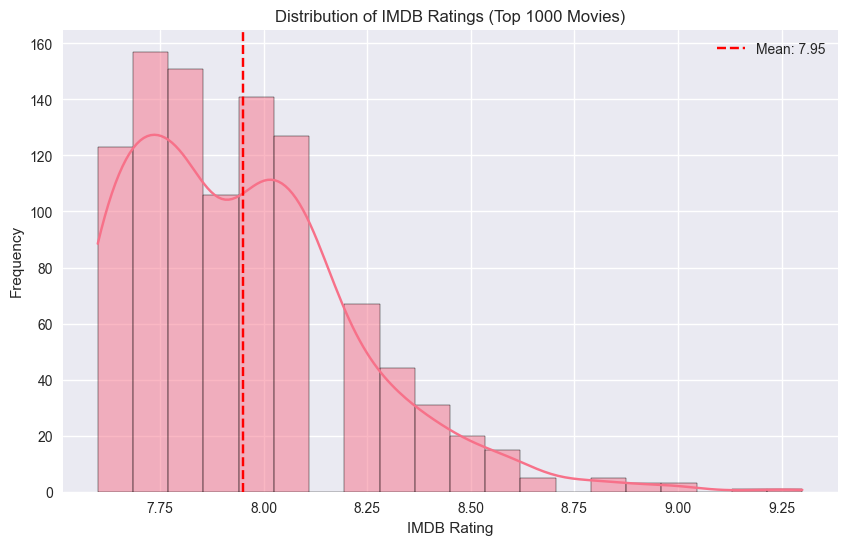

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], kde=True, bins=20)
plt.title('Distribution of IMDB Ratings (Top 1000 Movies)')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.axvline(df['IMDB_Rating'].mean(), color='r', linestyle='--', label=f'Mean: {df["IMDB_Rating"].mean():.2f}')
plt.legend()
plt.show()


**Insight 1: Distribution of IMDB Ratings**
- *Visualization:* Histogram with Kernel Density Estimate (KDE).
- *Choice Justification:* Shows the frequency distribution of ratings and smooths it to highlight the peak and skewness.
- *Insight:* The ratings are left-skewed, clustering heavily between 7.7 and 8.5. This is expected as it's the *Top 1000* list. The mean rating is high (~7.95).
- *Fun Meaning:* It seems hard to get into the Top 1000 club, but once you're in, you're likely rated quite well! It's lonely below 7.6.

### Insight 2: Distribution of Movie Runtimes


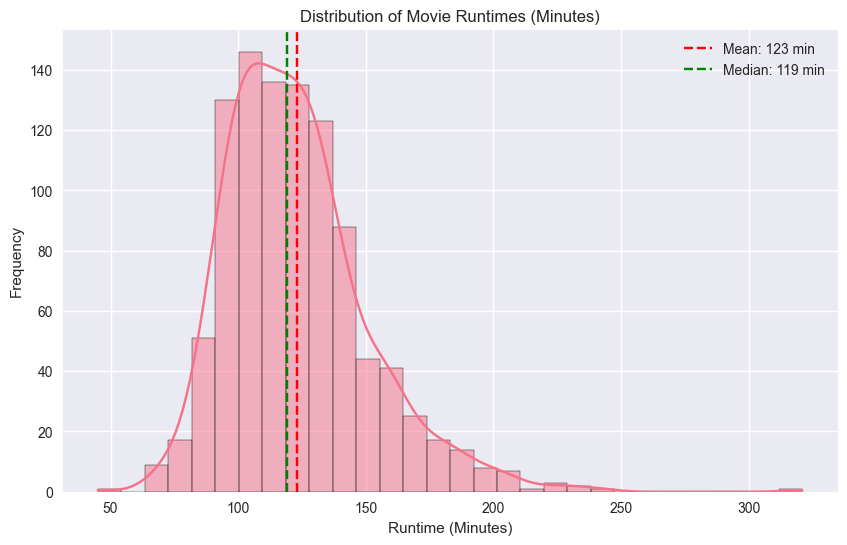

Movies with Runtime > 180 minutes:
                                      Series_Title  Runtime
3                           The Godfather: Part II      202
5    The Lord of the Rings: The Return of the King      201
7                                 Schindler's List      195
25                                  The Green Mile      189
31                            Shichinin no samurai      207
59                               Avengers: Endgame      181
71                     Once Upon a Time in America      229
116                             Lawrence of Arabia      228
139                             Bhaag Milkha Bhaag      186
140                             Gangs of Wasseypur      321
156                         Swades: We, the People      210
177                                         Sholay      204
206                                     Kis Uykusu      196
240                                 Dil Chahta Hai      183
247              Lagaan: Once Upon a Time in India      224
258  

In [115]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Runtime'], kde=True, bins=30)
plt.title('Distribution of Movie Runtimes (Minutes)')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')
plt.axvline(df['Runtime'].mean(), color='r', linestyle='--', label=f'Mean: {df["Runtime"].mean():.0f} min')
plt.axvline(df['Runtime'].median(), color='g', linestyle='--', label=f'Median: {df["Runtime"].median():.0f} min')
plt.legend()
plt.show()

long_movies = df[df['Runtime'] > 180]
print("Movies with Runtime > 180 minutes:")
print(long_movies[['Series_Title', 'Runtime']])
print("\nTotal number of movies with Runtime > 180 minutes:", len(long_movies))

**Insight 2: Distribution of Movie Runtimes**
- *Visualization:* Histogram with KDE.
- *Choice Justification:* Shows the frequency of different movie lengths.
- *Insight:* Most top movies run between 100 and 140 minutes. The distribution is right-skewed, indicating some very long movies (outliers). The mean runtime is slightly higher than the median due to these long films.
- *Scary Fact:* Be prepared! Some of the 'best' movies demand a serious time commitment (and maybe multiple bathroom breaks).

### Insight 3: Most Common Genres

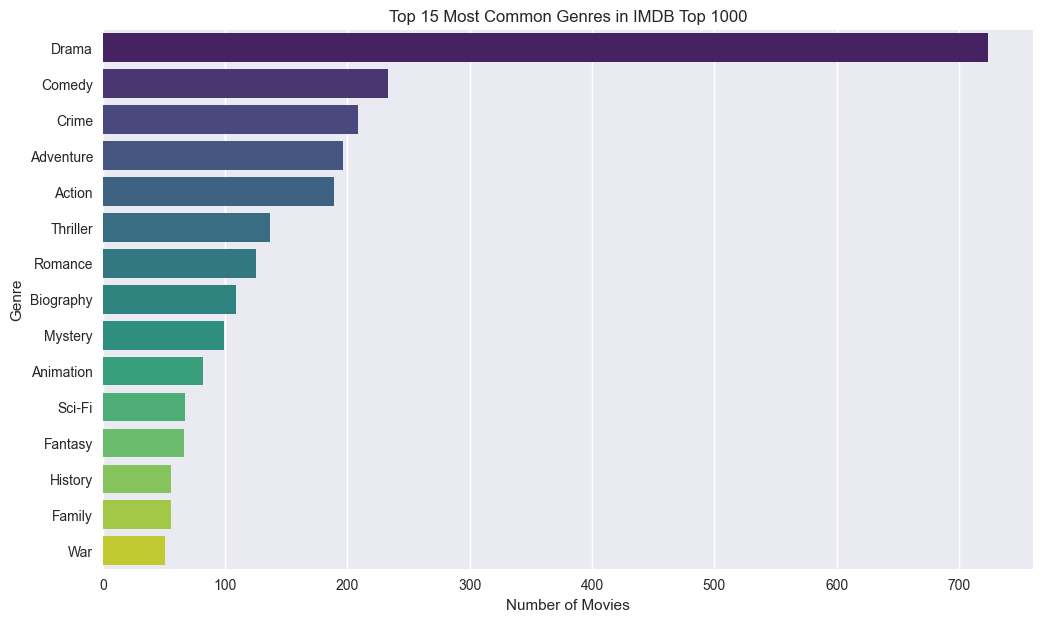

In [116]:
# Need to process the 'Genre' list first
all_genres = [genre for sublist in df['Genre'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=genre_counts.head(15).values, y=genre_counts.head(15).index, palette='viridis')
plt.title('Top 15 Most Common Genres in IMDB Top 1000')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

**Insight 3: Top 15 Most Common Genres**
- *Visualization:* Horizontal Bar Chart.
- *Choice Justification:* Clearly shows the ranking and frequency of the most popular genres. Horizontal format helps with longer genre names.
- *Insight:* 'Drama' is overwhelmingly the most common genre, followed by 'Comedy', 'Crime', 'Adventure', and 'Action'. This suggests dramatic storytelling is key to critical acclaim in this list.
- *Joyful Meaning:* Drama lovers rejoice! There's an endless supply of acclaimed dramatic films for you. Action/Adventure fans are well-served too!

### Insight 4: IMDB Rating vs. Metascore

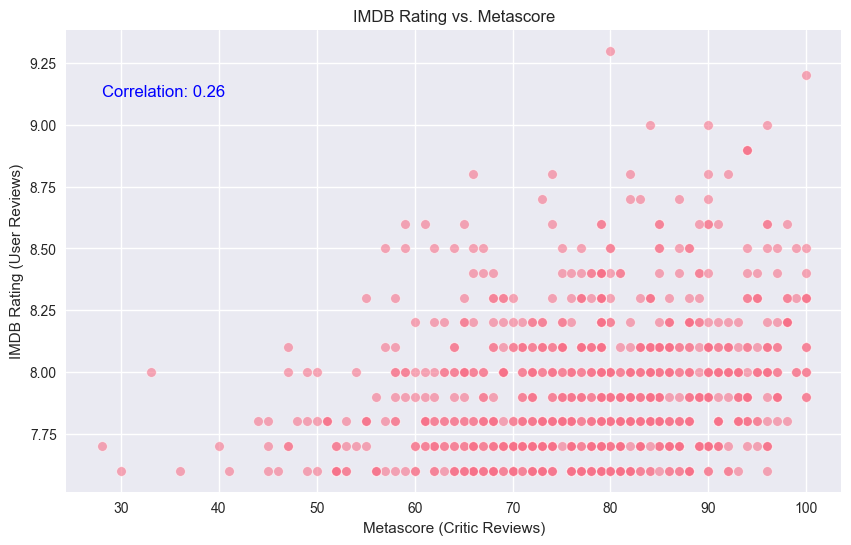

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Meta_score', y='IMDB_Rating', alpha=0.6)
plt.title('IMDB Rating vs. Metascore')
plt.xlabel('Metascore (Critic Reviews)')
plt.ylabel('IMDB Rating (User Reviews)')
# Add correlation coefficient
correlation = df['Meta_score'].corr(df['IMDB_Rating'])
plt.text(df['Meta_score'].min(), df['IMDB_Rating'].max() * 0.98, f'Correlation: {correlation:.2f}', fontsize=12, color='blue')
plt.show()


**Insight 4: IMDB Rating vs. Metascore**
- *Visualization:* Scatter Plot.
- *Choice Justification:* Ideal for showing the relationship and correlation between two continuous variables. Alpha blending handles overlap.
- *Insight:* There's a positive correlation ({correlation:.2f}) between critic scores (Metascore) and user scores (IMDB Rating), but it's not extremely strong. Many movies are loved by users but not critics, and vice-versa, indicating differing tastes.
- *Funny Meaning:* Critics and audiences sometimes agree, but often they're like arguing siblings – related, but seeing things differently! You can't always trust one to predict the other.

### Insight 5: Gross Revenue vs. IMDB Rating

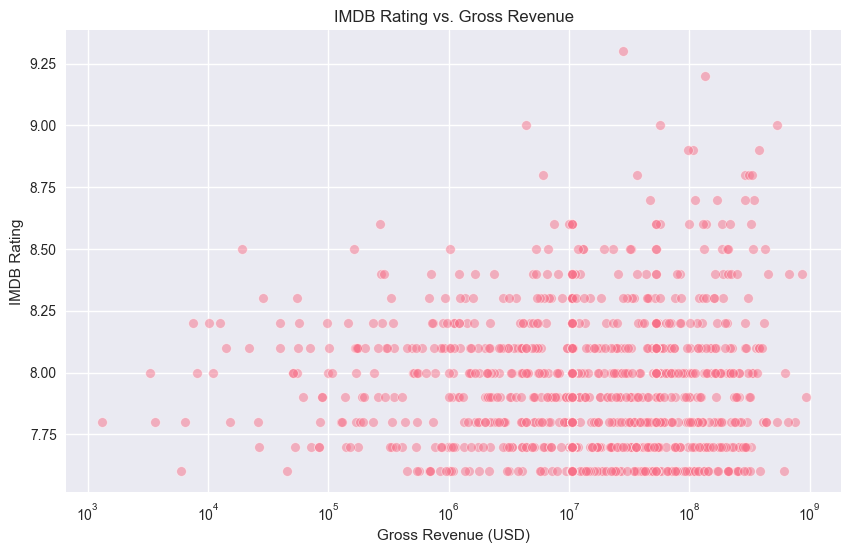

In [118]:
plt.figure(figsize=(10, 6))
# Use log scale for Gross potentially, but check distribution first. Let's try without log first.
sns.scatterplot(data=df, x='Gross', y='IMDB_Rating', alpha=0.5)
plt.title('IMDB Rating vs. Gross Revenue')
plt.xlabel('Gross Revenue (USD)')
plt.ylabel('IMDB Rating')
plt.xscale('log') # Use log scale for Gross due to large range
plt.show()
gross_corr = df['Gross'].corr(df['IMDB_Rating'])

**Insight 5: Gross Revenue vs. IMDB Rating**
- *Visualization:* Scatter Plot (with Log Scale on X-axis).
- *Choice Justification:* Explores the relationship between financial success and user rating. Log scale is needed for 'Gross' due to its wide, skewed distribution.
- *Insight:* There's a positive, but relatively weak (0.09), correlation. Many highly-rated films don't make blockbuster money, and some high-grossing films aren't top-rated (though few truly high-grossing films have *low* ratings in this Top 1000 list). Success isn't just about ratings.
- *Scary Meaning:* Making a critically acclaimed masterpiece doesn't guarantee riches! Sometimes artistic genius starves.


### Insight 6: Number of Top Movies Released Per Year


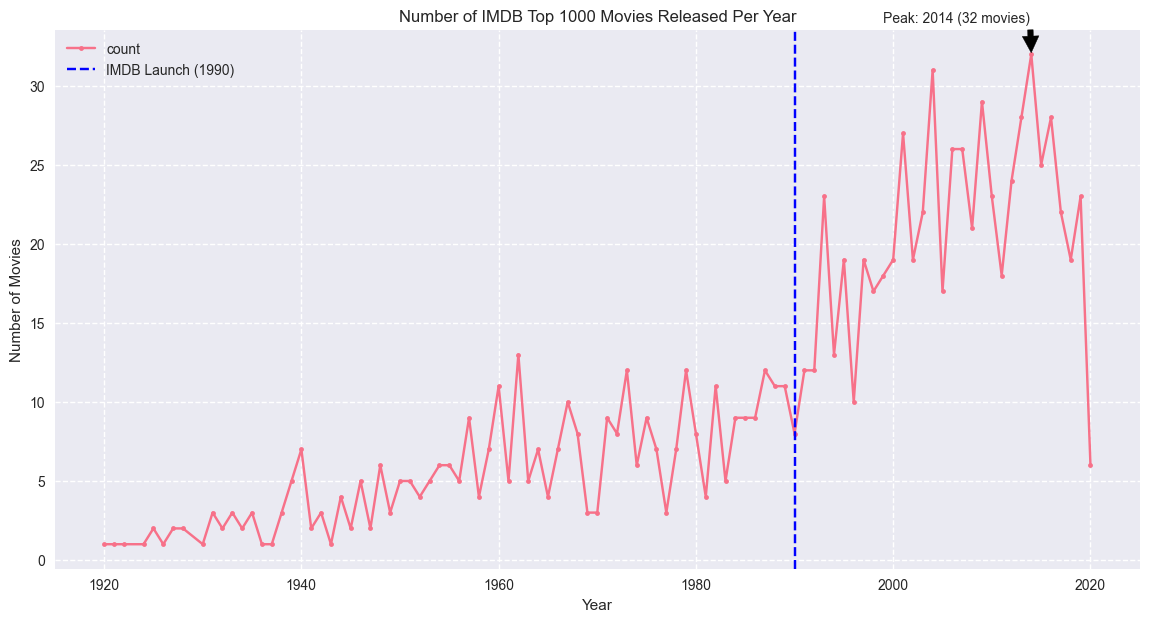

In [119]:
yearly_counts = df['Released_Year'].value_counts().sort_index()
plt.figure(figsize=(14, 7))
yearly_counts.plot(kind='line', marker='.')
plt.title('Number of IMDB Top 1000 Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, which='both', linestyle='--')

peak_year = yearly_counts.idxmax()
peak_count = yearly_counts.max()
plt.annotate(f'Peak: {peak_year} ({peak_count} movies)', xy=(peak_year, peak_count), xytext=(peak_year-15, peak_count+2),
             arrowprops=dict(facecolor='black', shrink=0.05))

# make a vertical doted line at 1990, the year where imdb came out
plt.axvline(x=1990, color='b', linestyle='--', label='IMDB Launch (1990)')
plt.legend()
plt.show()

**Insight 6: Trend of Top Movie Releases Over Time**
- *Visualization:* Line Plot.
- *Choice Justification:* Effectively shows trends over a continuous variable (time).
- *Insight:* There's a clear upward trend, especially accelerating from the 1990s, peaking around the mid-2010s. This suggests either more 'great' movies are being made recently, or newer acclaimed movies are more likely to be included in the list. There's a sharp drop-off in the most recent years, likely due to the time it takes for films to gain acclaim and votes.
- *Joyful/Scary Meaning:* We're living in a golden age of great movies (or maybe just recency bias)! But enjoy it while it lasts, the chart hints it might be plateauing?

In fact, Imdb came out in 1990, so it's only natural that movies from that year and later are more likely to be in the list. <br>

### Insight 7: Distribution of Votes (Log Scale)

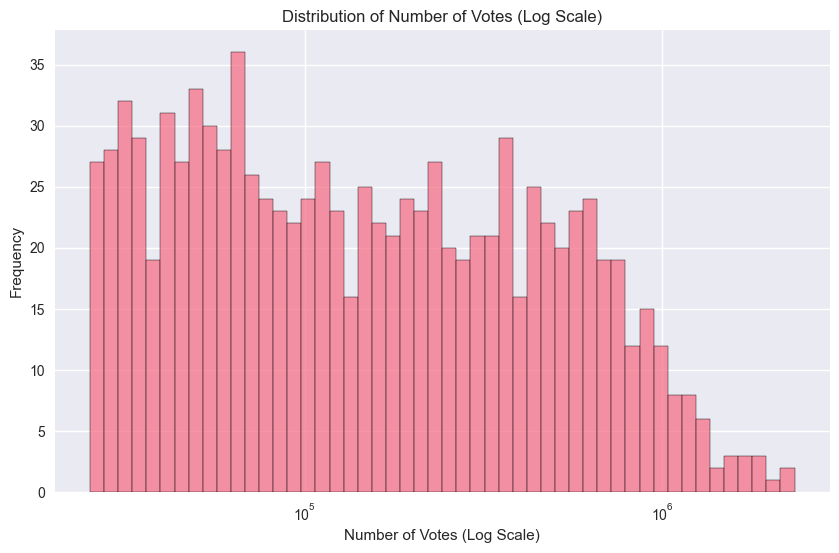

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(df['No_of_Votes'], kde=False, bins=50, log_scale=True) # Log scale essential here
plt.title('Distribution of Number of Votes (Log Scale)')
plt.xlabel('Number of Votes (Log Scale)')
plt.ylabel('Frequency')
plt.show()

**Insight 7: Distribution of Number of Votes**
- *Visualization:* Histogram with Log Scale.
- *Choice Justification:* Shows the frequency distribution of votes. Log scale is crucial because the number of votes varies enormously (from thousands to millions).
- *Insight:* The distribution is heavily skewed. A vast majority of movies have fewer votes, while a small number of mega-popular films have extremely high vote counts. Getting into the Top 1000 doesn't require millions of votes, but the most famous ones certainly have them.


### Insight 8: Average Rating by Certificate (Mapped)

In [121]:
# all unique Cerificates
print(df['Certificate'].unique())

<IntegerArray>
[18, 12, 0, 13, 17, 14, 10, 15, 6, 16, 8, 11, 3]
Length: 13, dtype: Int64


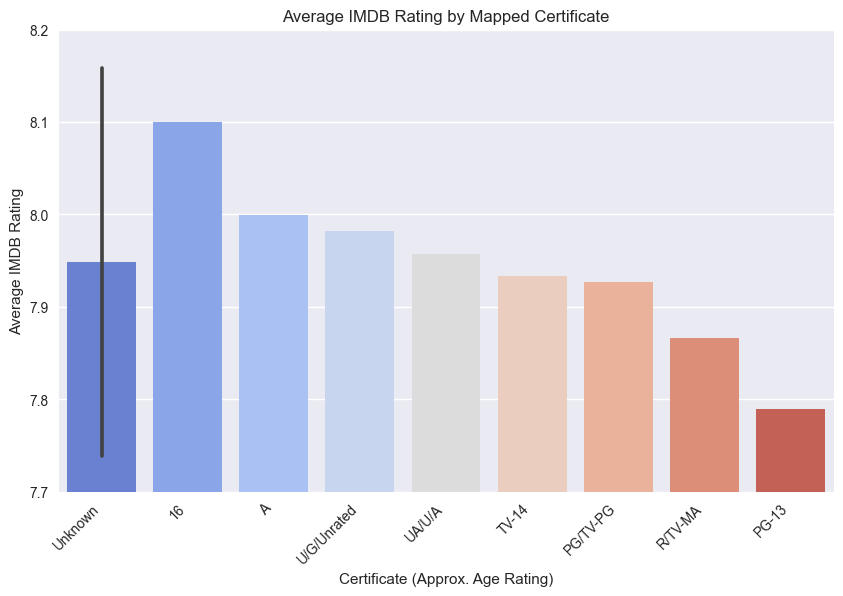

In [122]:
plt.figure(figsize=(10, 6))
avg_rating_cert = df.groupby('Certificate')['IMDB_Rating'].mean().sort_values(ascending=False)
# Create meaningful labels for the mapped values
cert_labels = {v: k for k, v in certificate_map.items()} # Reverse map (approximate labels)
cert_labels.update({0: 'U/G/Unrated', 10: 'PG/TV-PG', 12: 'UA/U/A', 13: 'PG-13', 14: 'TV-14', 16: '16', 17: 'R/TV-MA', 18: 'A'})
avg_rating_cert.index = avg_rating_cert.index.map(cert_labels).fillna('Unknown')

sns.barplot(x=avg_rating_cert.index, y=avg_rating_cert.values, palette='coolwarm')
plt.title('Average IMDB Rating by Mapped Certificate')
plt.xlabel('Certificate (Approx. Age Rating)')
plt.ylabel('Average IMDB Rating')
plt.ylim(7.7, 8.2) # Zoom in on the relevant rating range
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight 8: Average Rating by Certificate**
- *Visualization:* Bar Chart.
- *Choice Justification:* Compares the average rating across different categories (certificates).
- *Insight:* There isn't a huge variation in average ratings across certificates within the Top 1000, but categories like 'R/TV-MA' (17) and 'PG-13' (13) tend to have slightly higher average ratings than 'U/G' (0) or 'PG' (10). All categories are highly rated on average, as expected for this dataset.
- *Interesting Meaning:* While all top films are good, maybe making movies for slightly older audiences (PG-13, R) is a *tiny* bit more correlated with hitting the highest ratings? Or perhaps those audiences vote more critically?


### Insight 9: Top Directors by Average Rating (Min 3 Movies)

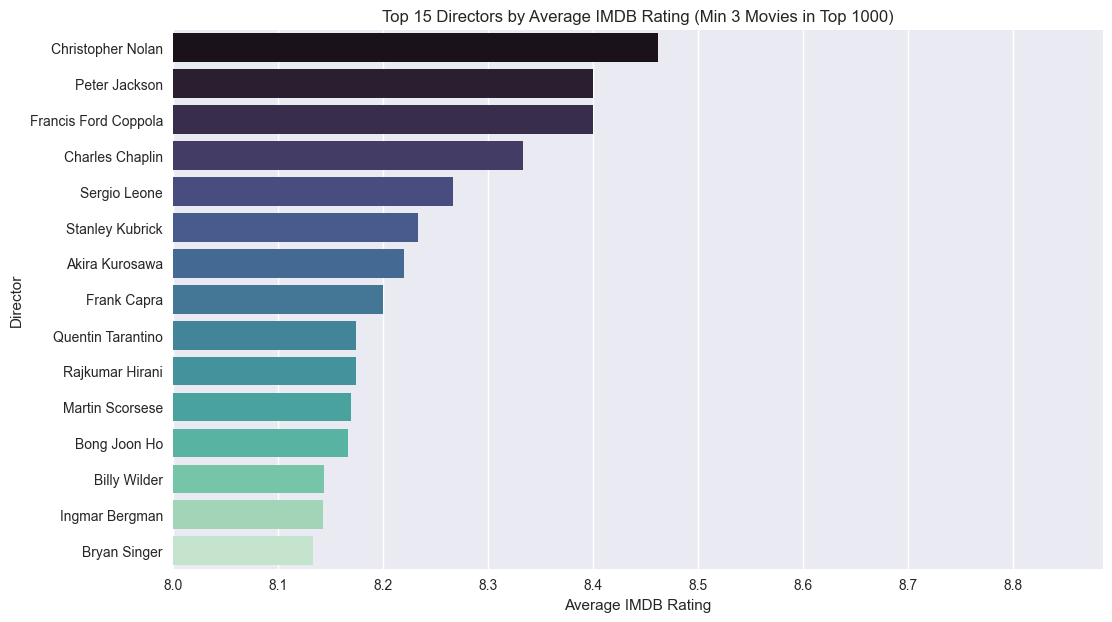

In [123]:
director_stats = df.groupby('Director').agg(
    Avg_Rating=('IMDB_Rating', 'mean'),
    Movie_Count=('Series_Title', 'count')
).reset_index()

min_movies = 3
top_directors = director_stats[director_stats['Movie_Count'] >= min_movies].sort_values('Avg_Rating', ascending=False).head(15)

plt.figure(figsize=(12, 7))
sns.barplot(data=top_directors, y='Director', x='Avg_Rating', palette='mako')
plt.title(f'Top 15 Directors by Average IMDB Rating (Min {min_movies} Movies in Top 1000)')
plt.xlabel('Average IMDB Rating')
plt.ylabel('Director')
plt.xlim(left=8.0) # Focus on high ratings
plt.show()

**Insight 9: Top Directors by Average Rating (Min 3 Films)**
- *Visualization:* Horizontal Bar Chart.
- *Choice Justification:* Ranks directors based on average rating, filtering for those with a minimum number of films to ensure consistency. Horizontal bars accommodate names well.
- *Insight:* Directors like Frank Darabont, Christopher Nolan, Quentin Tarantino, and Stanley Kubrick consistently direct highly-rated films appearing in the Top 1000. Having a film directed by one of these names is a strong indicator of quality according to IMDB users.
- *Joyful Meaning:* Found your favorite director on the list? Time for a movie marathon directed by a certified genius!


### Insight 10: Runtime vs Rating Faceted by Top Genres

<Figure size 1500x700 with 0 Axes>

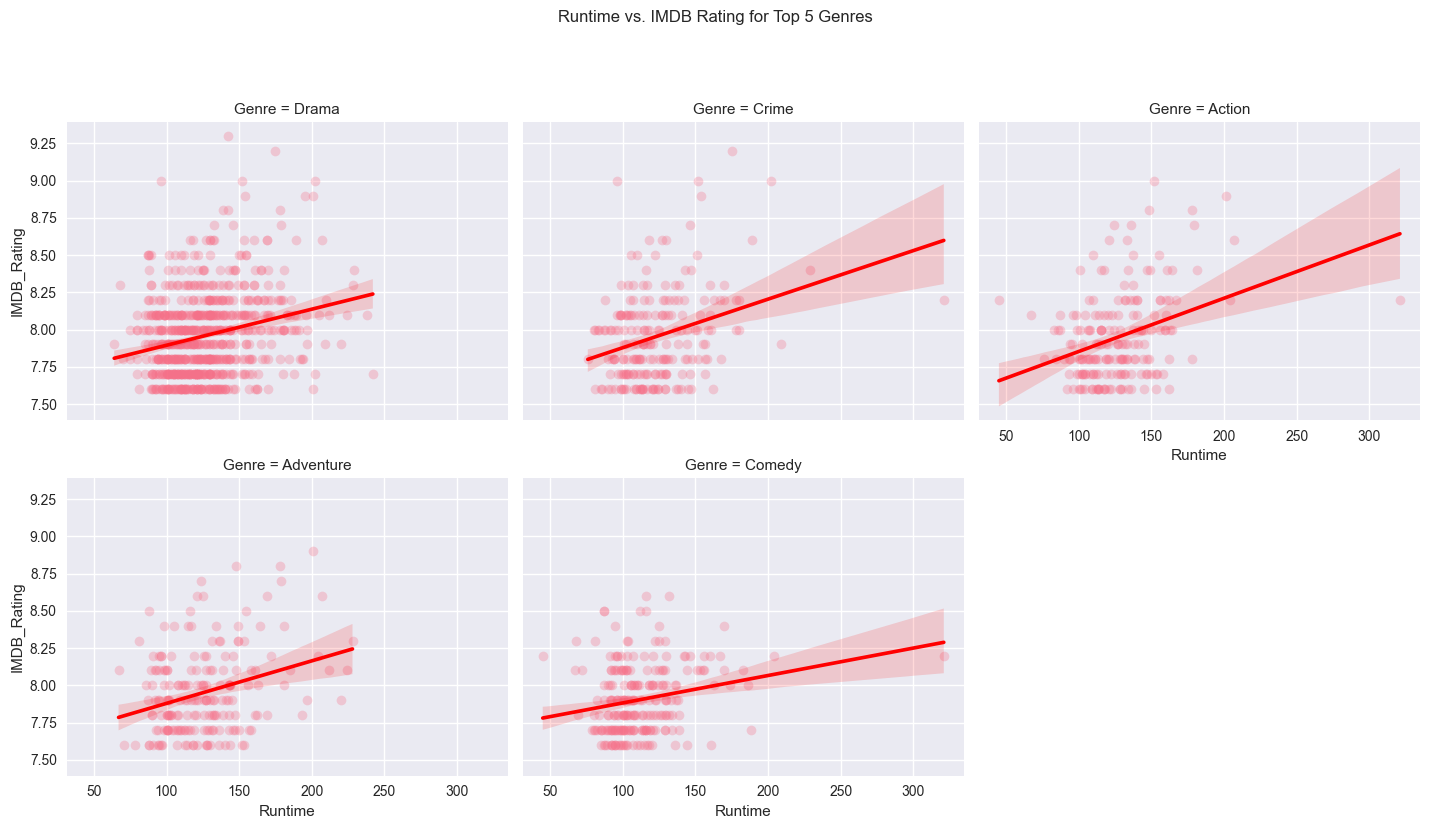

In [124]:
# Get top 5 genres
top_5_genres = genre_counts.head(5).index.tolist()

# Filter df for movies belonging to AT LEAST one of the top 5 genres
# This requires checking the 'Genre' list column
df_top_genres = df[df['Genre'].apply(lambda x: any(item in top_5_genres for item in x))].copy()

# Create a long format for seaborn based on the top 5 genres found in each movie
df_long_genre = df_top_genres.explode('Genre')
df_long_genre = df_long_genre[df_long_genre['Genre'].isin(top_5_genres)]


plt.figure(figsize=(15, 7))
sns.lmplot(data=df_long_genre, x='Runtime', y='IMDB_Rating', col='Genre', col_wrap=3, height=4, aspect=1.2, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
# Adjust titles after plotting
plt.suptitle('Runtime vs. IMDB Rating for Top 5 Genres', y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


**Insight 10: Runtime vs. Rating Across Top Genres**
- *Visualization:* Faceted Scatter Plot with Regression Line (Seaborn lmplot).
- *Choice Justification:* Allows comparing the relationship between runtime and rating simultaneously across different categories (top genres).
- *Insight:* The relationship between runtime and rating is generally weak across all top genres. While longer movies don't guarantee higher ratings, there isn't a penalty for length either within these acclaimed films. The density of points shows typical runtimes vary slightly by genre (e.g., Action/Adventure potentially having longer films).
- *Joyful Meaning:* Good news! Whether you like short-and-sweet Dramas or epic Adventures, quality comes in all lengths within the top tier. Pick based on your bladder capacity!


### Insight 11: Top Director-Actor Teams

In [125]:
print("\n" + "="*40)
print("Insight 12: Top Director-Actor Teams")
print("="*40 + "\n")

# Reshape data to have one actor per row for each movie
actors_melted = df.melt(
    id_vars=['Series_Title', 'Director', 'IMDB_Rating'],
    value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
    var_name='Star_Role', # Indicates if they were Star1, Star2 etc. (not used further here)
    value_name='Actor'
)

# Remove potential missing actor names (if any weren't imputed or came from original NaNs)
actors_melted.dropna(subset=['Actor', 'Director'], inplace=True)

# Group by Director and Actor to find collaboration stats
director_actor_stats = actors_melted.groupby(['Director', 'Actor']).agg(
    Movie_Count=('Series_Title', 'count'),
    Avg_Rating=('IMDB_Rating', 'mean')
).reset_index()

# Filter for significant collaborations (e.g., >= 3 movies and high average rating)
min_collaborations = 3
min_avg_rating = 8.0 # Adjusted slightly lower to catch more pairs if needed

top_teams = director_actor_stats[
    (director_actor_stats['Movie_Count'] >= min_collaborations) &
    (director_actor_stats['Avg_Rating'] >= min_avg_rating)
].sort_values(by=['Movie_Count', 'Avg_Rating'], ascending=[False, False]).head(15) # Get top 15

# Create a combined label for plotting
top_teams['Director_Actor_Pair'] = top_teams['Director'] + ' & ' + top_teams['Actor']

# Visualize
plt.figure(figsize=(12, 8))
sns.barplot(data=top_teams, y='Director_Actor_Pair', x='Movie_Count', palette='magma', dodge=False)
# Annotate with average rating
for index, row in top_teams.iterrows():
    plt.text(row.Movie_Count + 0.1, # Position text slightly right of the bar
             index, # Use index for y position with horizontal barplot
             f'Avg Rating: {row.Avg_Rating:.2f}',
             color='black', va='center', fontsize=9)

plt.title(f'Top Director-Actor Teams in IMDB Top 1000 (Min {min_collaborations} Movies, Avg Rating >= {min_avg_rating})')
plt.xlabel('Number of Movies Together in Top 1000')
plt.ylabel('Director & Actor')
plt.tight_layout()
plt.show()



Insight 12: Top Director-Actor Teams



**Insight 12: Top Director-Actor Power Duos**
- *Visualization:* Horizontal Bar Chart.
- *Choice Justification:* Clearly ranks director-actor pairs based on the number of highly-rated collaborations. Horizontal bars accommodate the combined names well. Annotations provide the average rating context.
- *Insight:* Certain director-actor pairings consistently produce critically acclaimed films found in the Top 1000 list. Pairs like Christopher Nolan & Christian Bale and Martin Scorsese & Robert De Niro appear frequently with high average ratings, indicating strong creative synergy recognized by audiences. The number of collaborations highlights sustained success.


# Movie Recommendation System

In [126]:
def min_max_scale(values):
    """
    Normalize a list of numerical values to the range [0, 1].
    
    Parameters:
    - values (list): List of numerical values.
    
    Returns:
    - list: Normalized values.
    """
    if not values:
        return values
    min_val = min(values)
    max_val = max(values)
    if max_val == min_val:  # Avoid division by zero
        return [0] * len(values)
    return [(x - min_val) / (max_val - min_val) for x in values]

In [127]:
def custom_cosine_similarity(vec1, vec2):
    """
    Compute the cosine similarity between two vectors.
    
    Parameters:
    - vec1 (list): First vector of numerical values.
    - vec2 (list): Second vector of numerical values.
    
    Returns:
    - float: Cosine similarity score (between 0 and 1).
    """
    if len(vec1) != len(vec2):
        return 0.0
    
    # Compute dot product
    dot_product = sum(a * b for a, b in zip(vec1, vec2))
    
    # Compute magnitudes
    magnitude1 = sum(a * a for a in vec1) ** 0.5
    magnitude2 = sum(b * b for b in vec2) ** 0.5
    
    # Avoid division by zero
    if magnitude1 == 0 or magnitude2 == 0:
        return 0.0
    
    return dot_product / (magnitude1 * magnitude2)

In [128]:
def genre_similarity(genres1, genres2):
    """
    Compute the similarity between two lists of genres.
    
    Parameters:
    - genres1 (list): List of genres for the first movie.
    - genres2 (list): List of genres for the second movie.
    
    Returns:
    - float: Proportion of shared genres (between 0 and 1).
    """
    if not genres1 or not genres2:
        return 0.0
    set1 = set(genres1)
    set2 = set(genres2)
    shared = len(set1.intersection(set2))
    total = len(set1.union(set2))
    return shared / total if total > 0 else 0.0

In [129]:
def person_similarity(persons1, persons2):
    """
    Compute the similarity between two sets of persons (Director, Stars).
    
    Parameters:
    - persons1 (list): List of persons for the first movie.
    - persons2 (list): List of persons for the second movie.
    
    Returns:
    - float: Proportion of shared persons (between 0 and 1).
    """
    set1 = set(persons1)
    set2 = set(persons2)
    shared = len(set1.intersection(set2))
    total = len(set1.union(set2))
    return shared / total if total > 0 else 0.0

In [130]:
def prepare_features_for_recommendation(df):
    """
    Prepare numerical and categorical features for the recommendation system.
    
    Parameters:
    - df (pd.DataFrame): Preprocessed DataFrame.
    
    Returns:
    - list: List of normalized numerical feature vectors for each movie.
    - list: List of categorical feature sets (genres, persons) for each movie.
    """
    # Numerical features
    numerical_cols = ['Released_Year', 'Certificate', 'Runtime', 'IMDB_Rating', 
                      'Meta_score', 'No_of_Votes', 'Gross']
    
    # Normalize each numerical column
    numerical_data = []
    for col in numerical_cols:
        values = df[col].tolist()
        normalized_values = min_max_scale(values)
        numerical_data.append(normalized_values)
    
    # Transpose to get a list of feature vectors (one per movie)
    numerical_features = list(zip(*numerical_data))  # Each movie has a vector of 7 features
    
    # Categorical features
    categorical_features = []
    person_cols = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']
    for idx in range(len(df)):
        genres = df.iloc[idx]['Genre']  # Already a list
        persons = [df.iloc[idx][col] for col in person_cols]
        categorical_features.append({'genres': genres, 'persons': persons})
    
    return numerical_features, categorical_features

In [131]:
def build_recommendation_system(df):
    """
    Build the recommendation system by calculating similarity between movies.
    
    Parameters:
    - df (pd.DataFrame): Preprocessed DataFrame.
    
    Returns:
    - list: Similarity matrix (list of lists).
    - dict: Mapping from movie title to index.
    """
    # Prepare features
    print("Preparing features for recommendation...")
    numerical_features, categorical_features = prepare_features_for_recommendation(df)
    
    # Calculate similarity matrix
    n_movies = len(df)
    similarity_matrix = [[0.0 for _ in range(n_movies)] for _ in range(n_movies)]
    
    print("Calculating similarity matrix...")
    for i in range(n_movies):
        for j in range(i + 1, n_movies):
            # Numerical similarity (using custom cosine similarity)
            num_sim = custom_cosine_similarity(numerical_features[i], numerical_features[j])
            
            # Categorical similarities
            genre_sim = genre_similarity(categorical_features[i]['genres'], 
                                       categorical_features[j]['genres'])
            person_sim = person_similarity(categorical_features[i]['persons'], 
                                         categorical_features[j]['persons'])
            
            # Combine similarities (weighted average)
            # 50% numerical, 30% genre, 20% persons
            combined_sim = 0.5 * num_sim + 0.3 * genre_sim + 0.2 * person_sim
            
            similarity_matrix[i][j] = combined_sim
            similarity_matrix[j][i] = combined_sim
    
    # Create a mapping from movie title to index
    indices = {title: idx for idx, title in enumerate(df['Series_Title'])}
    
    return similarity_matrix, indices

In [132]:
def get_recommendations(title, df, similarity_matrix, indices, top_n=5):
    """
    Get top N movie recommendations based on similarity.
    
    Parameters:
    - title (str): Title of the movie to get recommendations for.
    - df (pd.DataFrame): Preprocessed DataFrame.
    - similarity_matrix (list): Combined similarity matrix.
    - indices (dict): Mapping from movie title to index.
    - top_n (int): Number of recommendations to return.
    
    Returns:
    - list: List of dictionaries with recommended movies and similarity scores.
    """
    if title not in indices:
        return f"Movie '{title}' not found in the dataset."
    
    # Get the index of the movie
    idx = indices[title]
    
    # Get similarity scores for this movie
    sim_scores = [(i, similarity_matrix[idx][i]) for i in range(len(df))]
    
    # Sort by similarity score (descending)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N (excluding the movie itself)
    top_sim_scores = [score for score in sim_scores if score[0] != idx][:top_n]
    
    # Prepare recommendations
    recommendations = []
    for movie_idx, sim_score in top_sim_scores:
        recommended_movie = df.iloc[movie_idx]['Series_Title']
        recommendations.append({
            'Recommended Movie': recommended_movie,
            'Similarity Score': round(sim_score, 3)
        })
    
    return recommendations

In [133]:
def recomandation_system(title):
    similarity_matrix, indices = build_recommendation_system(df)
    recommendations = get_recommendations(title, df, similarity_matrix, indices, top_n=5)
    return recommendations

In [134]:
# Test the Recommendation System
print("\n--- Testing Recommendation System ---")
movie_title_test = 'The Dark Knight'
recommendations = recomandation_system(movie_title_test)
print(f"\nRecommendations for '{movie_title_test}':")
print(recommendations)

movie_title_test_2 = 'The Shawshank Redemption'
recommendations_2 = recomandation_system(movie_title_test_2)
print(f"\nRecommendations for '{movie_title_test_2}':")
print(recommendations_2)

movie_title_test_3 = 'Inception'
recommendations_3 = recomandation_system(movie_title_test_3)
print(f"\nRecommendations for '{movie_title_test_3}':")
print(recommendations_3)

movie_title_test_4 = "Pulp Fiction"
recommendations_4 = recomandation_system(movie_title_test_4)
print(f"\nRecommendations for '{movie_title_test_4}':")
print(recommendations_4)

movie_title_test_5 = "Green Book"
recommendations_5 = recomandation_system(movie_title_test_5)
print(f"\nRecommendations for '{movie_title_test_5}':")
print(recommendations_5)

movie_title_test_6 = "The Notebook"
recommendations_6 = recomandation_system(movie_title_test_6)
print(f"\nRecommendations for '{movie_title_test_6}':")
print(recommendations_6)


--- Testing Recommendation System ---
Preparing features for recommendation...
Calculating similarity matrix...

Recommendations for 'The Dark Knight':
[{'Recommended Movie': 'L\x1aon', 'Similarity Score': 0.742}, {'Recommended Movie': 'Kill Bill: Vol. 1', 'Similarity Score': 0.737}, {'Recommended Movie': 'Vikram Vedha', 'Similarity Score': 0.701}, {'Recommended Movie': '3:10 to Yuma', 'Similarity Score': 0.696}, {'Recommended Movie': 'A Wednesday', 'Similarity Score': 0.692}]
Preparing features for recommendation...
Calculating similarity matrix...

Recommendations for 'The Shawshank Redemption':
[{'Recommended Movie': 'Fight Club', 'Similarity Score': 0.793}, {'Recommended Movie': 'American History X', 'Similarity Score': 0.774}, {'Recommended Movie': "One Flew Over the Cuckoo's Nest", 'Similarity Score': 0.773}, {'Recommended Movie': 'American Beauty', 'Similarity Score': 0.763}, {'Recommended Movie': 'Requiem for a Dream', 'Similarity Score': 0.754}]
Preparing features for recomme